# Redes de filas

## Medidas Operacionais
* $T$: Tempo total de observação
* $M$: Número de dispositivos no sistema
* $C$: Quantidade de chegadas ao sistema no tempo T
* $C_{i}$: Quantidade de chegadas ao subsistema i no tempo T
* $P$: Quantidade de partidas do sistema (solicitações tratadas) no tempo de observação
* $P_{i}$: Quantidade de partidas do subsistema i (solicitações tratadas) no tempo de observação
* $\lambda$: Taxa de chegada no sistema
* $\lambda_{i}$: Taxa de chegada no subsistema i                
* $\mu$: Vazão do sistema
* $V$: Vazão do subsistema i
* $D$: Demanda - tempo no sistema para atender uma tarefa (incluindo todas as visitas)
* $D_{i}$: Demanda - tempo no subsistema i para atender uma tarefa (incluindo todas as visitas)
* $V_{i}$: Número de visitas ao subsistema i necessárias para atender uma tarefa
* $N$: Número médio de tarefas no sistema
* $N_{i}$: Número médio de tarefas no subsistema i
* $R$: Tempo médio de resposta do sistema
* $R_{i}$: Tempo médio de resposta do subsistema i
* $S$: Tempo médio de serviço no sistema
* $S_{i}$: Tempo médio de serviço no subsistema i
* $B$: Tempo que o sistema permanece ocupado
* $B_{i}$: Tempo que o subsistema i permanece ocupado
* $U$: Taxa de utilização do sistema
* $U_{i}$: Taxa de utilização do subsistema i

## Relações Operacionais
* $\lambda_{i}=C_{i}/T$
* $\mu_{i}=P_{i}/T$
* $U_{i}=B_{i}/T$
* $S_{i}=B_{i}/P_{i}$
* $V_{i}=P_{i}/P$
* $\mu_{i}=\mu/V_{i}$


* $D=\sum_{}^{}D_{i}$
* $D_{i}=S_{i}\cdot V_{i}$
* $U_{i}=\mu_{i}\cdot S_{i}=\mu\cdot S_{i}\cdot V_{i}=\mu \cdot D_{i}$
* $N_{i}= U_{i} / (1 - U_{i})$
* $N_{i}= \mu_{i} \cdot R_{i}$
* $N=\sum_{}^{}N_{i}$
* $R_{i}= S_{i} / (1 - U_{i})$
* $R=\sum_{}^{} R_{i}\cdot V_{i}$

### Exercício 1
Durante um período de observação de 10.000 milissegundos foram processadas 400.000 transações em um servidor de autenticação. O tempo de processamento de uma autenticação é 0,005 milissegundos. Calcular a taxa de utilização e o tempo de resposta do servidor de autenticação?<br>
Dados:
* A quantidade de transações processadas é o número de partidas observadas $P$.
* $\mu=P/T$ (vazão)
* $S=0.005$ (tempo de serviço)

In [1]:
P = 400000
T = 10000
Mu = P/T
S = 0.005

U = Mu * S
print("Taxa de utilização:", U)

R = S / (1 - U)
print("Tempo de resposta:", R)

Taxa de utilização: 0.2
Tempo de resposta: 0.0062499999999999995


### Exercício 2
Um servidor web foi observado durante umperíodo de tempo. A taxa de utilização medida foi de 30%. O tempo de resposta médio  para as transações nesse período foi de 0,25 segundos. Calcular a quantidade de transações executadas nesse período de observação e o tempo de serviço médio.<br>
Dados
* $T=10\cdot 60$ segundos
* $U = 0.3$
* $R = 0.25$<br>


Dicas:
* Calcular número médio de tarefas no sistema ($N$) usando a taxa de utilização ($U$)
* Calcular a vazão ($\mu$) usando o número médio de tarefas no sistema ($N$) e tempo de resposta ($R$)
* Calcular o tempo de serviço médio ($S$) utilizando a taxa de utilização ($U$) e a vazão ($\mu$)

In [2]:
T = 10 * 60
U = 0.3
R = 0.25

N = U / (1 - U)
print("Número médio de tarefas no sistema:", N)

Mu = N / R
print("Vazão:", Mu)

S = U / Mu
print("Tempo de serviço médio:", S)

P = Mu * T
print("Quantidade de transações executadas:", P)

Número médio de tarefas no sistema: 0.4285714285714286
Vazão: 1.7142857142857144
Tempo de serviço médio: 0.175
Quantidade de transações executadas: 1028.5714285714287


## Limites de desempenho

### Exercício 3
Realizar a análise de **limites de desempenho** para um sistema formado por rede de filas fechada com quatro subsistemas (A, B, C D) a partir das seguintes informações observadas.<br>
Quantidade de visitas:
* Subsistema A: 267
* Subsistema B: 86
* Subsistema C: 122
* Subsistema D: 58


Tempo de serviço:
* Subsistema A: 0,12 ms
* Subsistema B: 0,46 ms
* Subsistema C: 0,08 ms
* Subsistema D: 0,15 ms

Realizar a análise para Nmax igual a 10.

### Importar bibliotecas

In [4]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [5]:
Vi = np.array([267, 86, 122, 58])
Si = np.array([0.12, 0.46, 0.08, 0.15])

Di = Vi * Si
print("Di:", Di)

D = np.sum(Di)
print("D:", D)

Dmax = np.max(Di)
print("Dmax:", Dmax)

Nestrela = D / Dmax
print("Nestrela:", Nestrela)

Nmax = 10
print("Nmax:", Nmax)


Ui = Di / D * Nmax

print("Ui:", Ui)


Ri = Si / (1 - Ui)
print("Ri:", Ri)


R = np.sum(Ri * Vi)
print("R:", R)

Di: [32.04 39.56  9.76  8.7 ]
D: 90.06
Dmax: 39.56
Nestrela: 2.276541961577351
Nmax: 10
Ui: [3.55762825 4.39262714 1.08372196 0.96602265]
Ri: [-0.04691847 -0.13558814 -0.95554377  4.41470588]
R: 115.28879064737328


### Análise de limite de desempenho

#### Função ALD

In [7]:
def ALD(Di, Nmax):
    R = [[Di.sum(), Di.sum()]]
    MU = [[0, 0]]
    Nestrela = Di.sum()/Di.max()
    for N in range(1,Nmax+1):
        Rmin = max(N*Di.max(), Di.sum()+(N-1)*Di.mean())
        if N == 1:
            Rmax = Di.sum()
        else:
            Rmax = Di.sum()+(N-1)*Di.max()
        R.append([Rmin, Rmax])
        MUmin = N/Rmax
        MUmax = N/Rmin
        MU.append([MUmin, MUmax])
    return R, MU

* Executar o algoritmo para Nmax = 8
* Preparar dados para plotagem
* Criar figura com 2 subplots
* Plotar gráfico de tempo de resposta
* Plotar gráfico de vazão

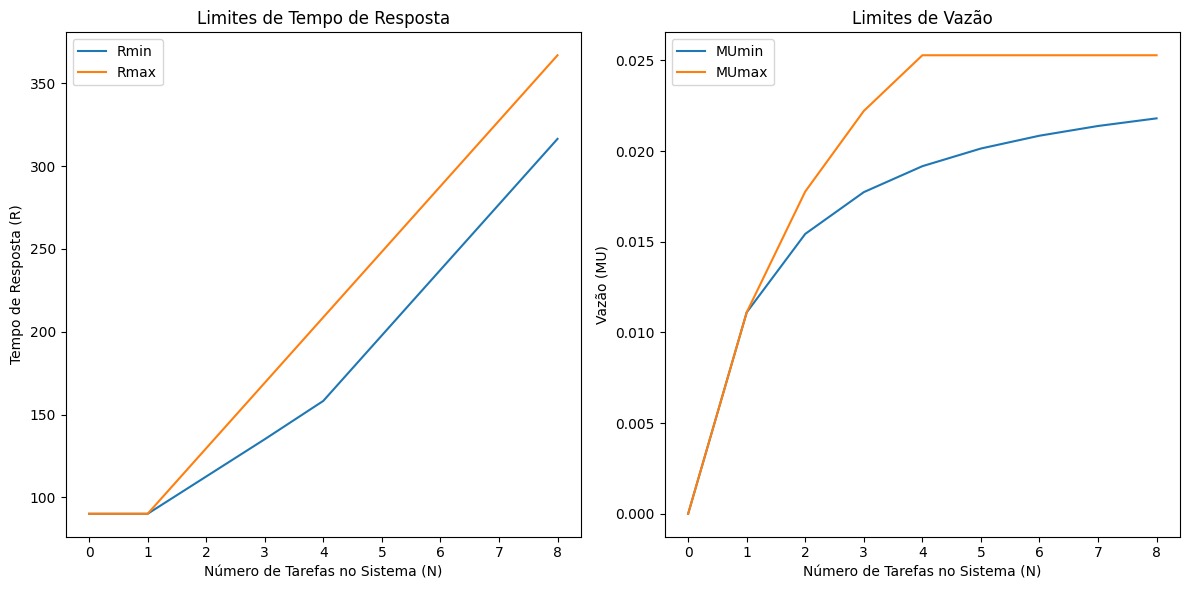

In [8]:

Nmax = 8
R, MU = ALD(Di, Nmax)

# Preparar dados para plotagem
N = np.arange(0, Nmax + 1)
Rmin = [r[0] for r in R]
Rmax = [r[1] for r in R]
MUmin = [mu[0] for mu in MU]
MUmax = [mu[1] for mu in MU]

# Criar figura com 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plotar gráfico de tempo de resposta
ax1.plot(N, Rmin, label="Rmin")
ax1.plot(N, Rmax, label="Rmax")
ax1.set_xlabel("Número de Tarefas no Sistema (N)")
ax1.set_ylabel("Tempo de Resposta (R)")
ax1.set_title("Limites de Tempo de Resposta")
ax1.legend()

# Plotar gráfico de vazão
ax2.plot(N, MUmin, label="MUmin")
ax2.plot(N, MUmax, label="MUmax")
ax2.set_xlabel("Número de Tarefas no Sistema (N)")
ax2.set_ylabel("Vazão (MU)")
ax2.set_title("Limites de Vazão")
ax2.legend()

plt.tight_layout()
plt.show()